<a href="https://colab.research.google.com/github/Geez-l/Project_197/blob/glee-branch/Final_version_1_%5BLR%26SVR%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>palAI & mAIs: Comparative Analysis of Machine
Learning Algorithms for Forecasting Palay and
Corn Production in Region VI (Western Visayas)</h1>

<h3>CMSC 197 Mini Project</h3>
<h4>AI Powered-Team (Manejo, Pajarilla, Vito)</h4>

<h3>Table of Contents</h3>

<ul>
    <li>Data Exploration</li>
    <li>Preprocessing</li>
    <li>Implementation of Machine Learning Algorithms
        <ul>
		<li>Linear Regression</li>
            <li>Random Forest Regression</li>
            <li>Support Vector Regression</li>
            <li> K-Nearest Neighbor (KNN)</li>
            <li>XGBoost</li>
            <li>Artificial Neural Network (ANN)</li>
        </ul>
    </li>
</ul>

<hr>
<h2> Preprocessing</h2>
<hr>

<h4> Importing Libraries </h4>

In [1]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### machine learning algorithms ####
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

# for ANN
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.optimizers import Adam

# for preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#### metrics of evaluation ####
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### time series ###
from statsmodels.tsa.seasonal import seasonal_decompose

<h4> Load production volume and area harvested dataset </h4>

In [2]:
production_data = pd.read_csv("https://raw.githubusercontent.com/kazeulo/Project_197/main/dataset/Production_volume.csv")
area_data = pd.read_csv("https://raw.githubusercontent.com/kazeulo/Project_197/main/dataset/Area_harvested.csv")

In [3]:
production_data.head(5)

,Croptype,Province,Quarter 1 1987,Quarter 2 1987,Quarter 3 1987,Quarter 4 1987,Quarter 1 1988,Quarter 2 1988,Quarter 3 1988,Quarter 4 1988,...,Quarter 1 2022,Quarter 2 2022,Quarter 3 2022,Quarter 4 2022,Quarter 1 2023,Quarter 2 2023,Quarter 3 2023,Quarter 4 2023,Quarter 1 2024,Quarter 2 2024
0,Irrigated Palay,Aklan,19309,8971,7603,15727,23007,4255,16790,11766,...,21812.54,7994.02,12843.31,20642.70,17725.19,4504.00,8023.29,20508.02,16674.00,2113.00
1,NaN,Antique,28275,7440,8542,22786,24485,4366,13921,13356,...,48447.00,19146.00,68364.00,46723.97,49682.35,16465.82,47858.70,46714.90,44793.44,12032.20
2,NaN,Capiz,18540,805,406,21903,17872,0,18969,7314,...,32306.30,12063.00,34517.30,25112.06,34479.18,14151.29,26893.60,16226.75,34625.30,12522.75
3,NaN,Guimaras,0,0,0,0,0,0,0,0,...,4328.00,911.00,6036.00,5334.00,5139.00,1020.00,4047.00,6451.00,3837.00,344.00
4,NaN,Iloilo,58187,14743,6823,81600,81691,1256,57985,65076,...,148946.00,14692.00,144971.00,106234.00,155663.00,9195.87,130644.00,160041.35,149292.00,6048.66


In [4]:
area_data.head(5)

,Croptype,Province,Quarter 1 1987,Quarter 2 1987,Quarter 3 1987,Quarter 4 1987,Quarter 1 1988,Quarter 2 1988,Quarter 3 1988,Quarter 4 1988,...,Quarter 1 2022,Quarter 2 2022,Quarter 3 2022,Quarter 4 2022,Quarter 1 2023,Quarter 2 2023,Quarter 3 2023,Quarter 4 2023,Quarter 1 2024,Quarter 2 2024
0,Irrigated Palay,Aklan,6130,3440,2290,6890,7510,1610,6770,4440,...,6668.0,2461.18,4662,5832.77,6696.0,2171,3067,5940,6094,1138
1,NaN,Antique,9030,2430,2590,6350,9430,1620,4310,4770,...,12115.0,5903.00,15630,11325.00,12202.0,4452,10647,11220,12384,3506
2,NaN,Capiz,6300,520,100,5860,5830,0,4790,1940,...,9210.0,4508.00,8470,6704.00,9876.0,4648,6870,5000,9880,4143
3,NaN,Guimaras,0,0,0,0,0,0,0,0,...,1380.0,279.88,1534,1439.00,1330.0,350,1121,1821,1258,190
4,NaN,Iloilo,21270,6030,1850,23310,26270,440,16520,19140,...,41245.0,4235.00,41123,29142.00,42500.0,2658,38145,44625,43392,2124


<h4>Transforming and merging data</h4>

In [5]:
production_data = pd.melt(production_data,
                        id_vars=['Croptype', 'Province'],
                        var_name='Quarter and Year',
                        value_name='Production')

area_data = pd.melt(area_data,
                        id_vars=['Croptype', 'Province'],
                        var_name='Quarter and Year',
                        value_name='Area')

# fill values for croptype
production_data['Croptype'] = production_data['Croptype'].ffill()
area_data['Croptype'] = area_data['Croptype'].ffill()

dataset = pd.merge(production_data, area_data, on=['Croptype', 'Province', 'Quarter and Year'], how='left')

In [6]:
dataset.head(5)

,Croptype,Province,Quarter and Year,Production,Area
0,Irrigated Palay,Aklan,Quarter 1 1987,19309.0,6130.0
1,Irrigated Palay,Antique,Quarter 1 1987,28275.0,9030.0
2,Irrigated Palay,Capiz,Quarter 1 1987,18540.0,6300.0
3,Irrigated Palay,Guimaras,Quarter 1 1987,0.0,0.0
4,Irrigated Palay,Iloilo,Quarter 1 1987,58187.0,21270.0


In [7]:
# split year and quarter into separte columns
dataset['Year'] = dataset['Quarter and Year'].apply(lambda x: int(x.split(' ')[-1]))
dataset['Quarter'] = dataset['Quarter and Year'].apply(lambda x: int(x.split(' ')[1][-1]))

# drop 'Quarter and Year' column
dataset.drop(columns=['Quarter and Year'], inplace=True)

# reorder columns
dataset = dataset[['Croptype', 'Province', 'Quarter', 'Year', 'Area', 'Production']]

In [8]:
dataset.head(5)

,Croptype,Province,Quarter,Year,Area,Production
0,Irrigated Palay,Aklan,1,1987,6130.0,19309.0
1,Irrigated Palay,Antique,1,1987,9030.0,28275.0
2,Irrigated Palay,Capiz,1,1987,6300.0,18540.0
3,Irrigated Palay,Guimaras,1,1987,0.0,0.0
4,Irrigated Palay,Iloilo,1,1987,21270.0,58187.0


In [9]:
rows, columns = dataset.shape

# Print the number of rows
print("Number of rows:", rows)

Number of rows: 4500


<h4>Create Date column</h4>

In [10]:
quarter_to_month = {1: 1, 2: 4, 3: 7, 4: 10}

# Create the 'Date' column
dataset['Date'] = pd.to_datetime(dataset['Year'].astype(str) +
                                  dataset['Quarter'].map(quarter_to_month).astype(str) + '01',
                                  format='%Y%m%d')

# Reorder columns so 'Date' is the leftmost column
dataset = dataset[['Date'] + [col for col in dataset.columns if col != 'Date']]

In [11]:
dataset.head(5)

,Date,Croptype,Province,Quarter,Year,Area,Production
0,1987-10-01,Irrigated Palay,Aklan,1,1987,6130.0,19309.0
1,1987-10-01,Irrigated Palay,Antique,1,1987,9030.0,28275.0
2,1987-10-01,Irrigated Palay,Capiz,1,1987,6300.0,18540.0
3,1987-10-01,Irrigated Palay,Guimaras,1,1987,0.0,0.0
4,1987-10-01,Irrigated Palay,Iloilo,1,1987,21270.0,58187.0


Since Guimaras was included in Iloilo prior to 1994, we'll drop the data for those years to ensure accuracy.

In [12]:
dataset = dataset[~((dataset['Province'].isin(['Guimaras', 'Iloilo'])) & (dataset['Year'] <= 1994))]

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Quarter'}>],
       [<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Area'}>],
       [<Axes: title={'center': 'Production'}>, <Axes: >]], dtype=object)

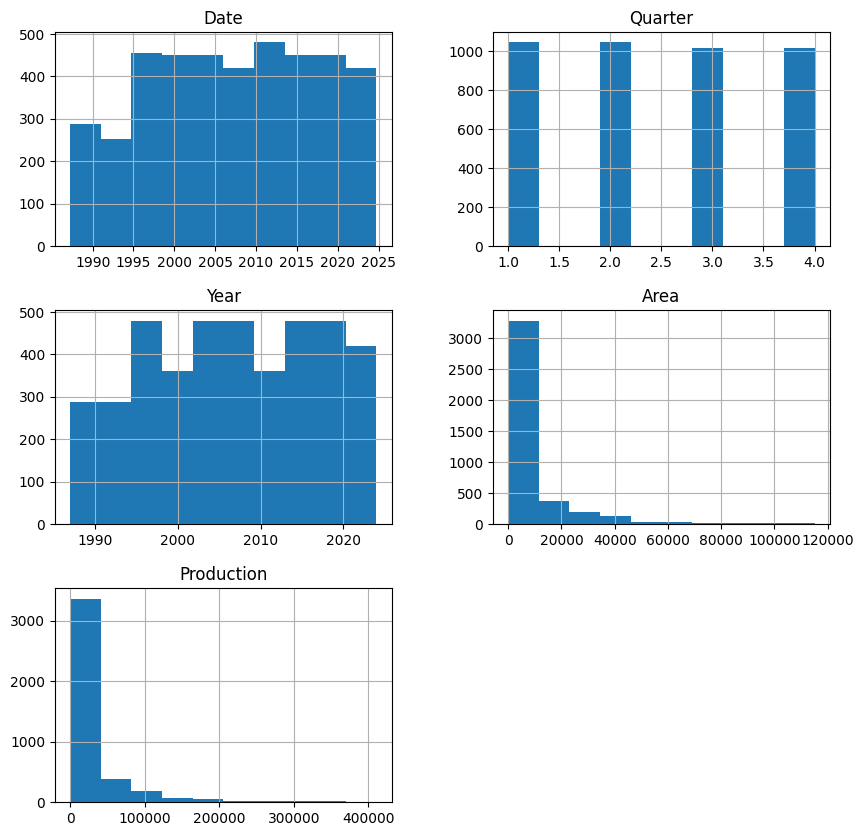

In [13]:
dataset.hist(figsize = (10, 10))

In [14]:
# descriptive statistics
desc_stats = dataset.describe()

print("Descriptive Statistics:")
desc_stats

Descriptive Statistics:


,Date,Quarter,Year,Area,Production
count,4116,4116.000000,4116.000000,4116.000000,4116.000000
mean,2007-03-11 01:11:22.215743488,2.485423,2006.629738,8365.982323,25329.648873
min,1987-04-01 00:00:00,1.000000,1987.000000,0.000000,0.000000
25%,1998-10-01 00:00:00,1.000000,1998.000000,179.750000,240.000000
50%,2007-07-01 00:00:00,2.000000,2007.000000,2137.500000,4992.500000
75%,2015-10-01 00:00:00,3.000000,2015.000000,8701.750000,26568.500000
max,2024-10-01 00:00:00,4.000000,2024.000000,115071.000000,411113.000000
std,NaN,1.118075,10.271357,15466.303607,49564.914948


In [15]:
# frequency distribution of categorical variables
print(dataset['Croptype'].value_counts())
print(dataset['Province'].value_counts())

Croptype
Irrigated Palay    686
Rainfed Palay      686
Palay              686
White Corn         686
Yellow Corn        686
Corn               686
Name: count, dtype: int64
Province
Aklan       900
Antique     900
Capiz       900
Guimaras    708
Iloilo      708
Name: count, dtype: int64


In [16]:
# check for zero values in the entire DataFrame
print((dataset == 0).sum())

Date            0
Croptype        0
Province        0
Quarter         0
Year            0
Area          153
Production    153
dtype: int64


Handling zero values. Using median since it is less sensitive to outliers.

In [17]:
# replace 0 with NaN
dataset.replace(0, np.nan, inplace=True)

# imputer = SimpleImputer(strategy='median')
# dataset[['Production', 'Area']] = imputer.fit_transform(dataset[['Production', 'Area']])

In [18]:
# drop rows that contains Nan
dataset = dataset.dropna()

In [19]:
rows, columns = dataset.shape

# Print the number of rows
print("Number of rows:", rows)

Number of rows: 3963


<b>Remove outliers.</b>

In [20]:
Q1 = dataset['Production'].quantile(0.25)
Q3 = dataset['Production'].quantile(0.75)
IQR = Q3 - Q1

In [21]:
dataset = dataset[(dataset['Production'] >= (Q1 - 1.5 * IQR)) & (dataset['Production'] <= (Q3 + 1.5 * IQR))]

In [22]:
rows, columns = dataset.shape

# Print the number of rows
print("Number of rows:", rows)

Number of rows: 3515


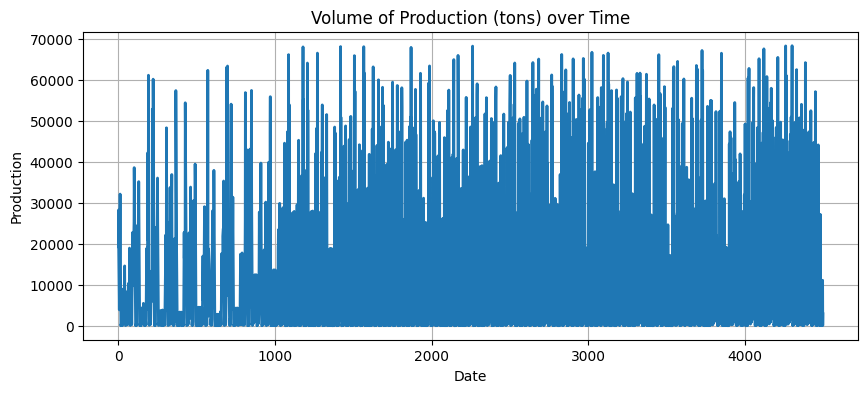

In [23]:
# visualizing the trend of 'Production' over time
plt.figure(figsize=(10, 4))
dataset['Production'].plot(title="Volume of Production (tons) over Time", linewidth=2)
plt.xlabel('Date')
plt.ylabel('Production')
plt.grid(True)
plt.show()

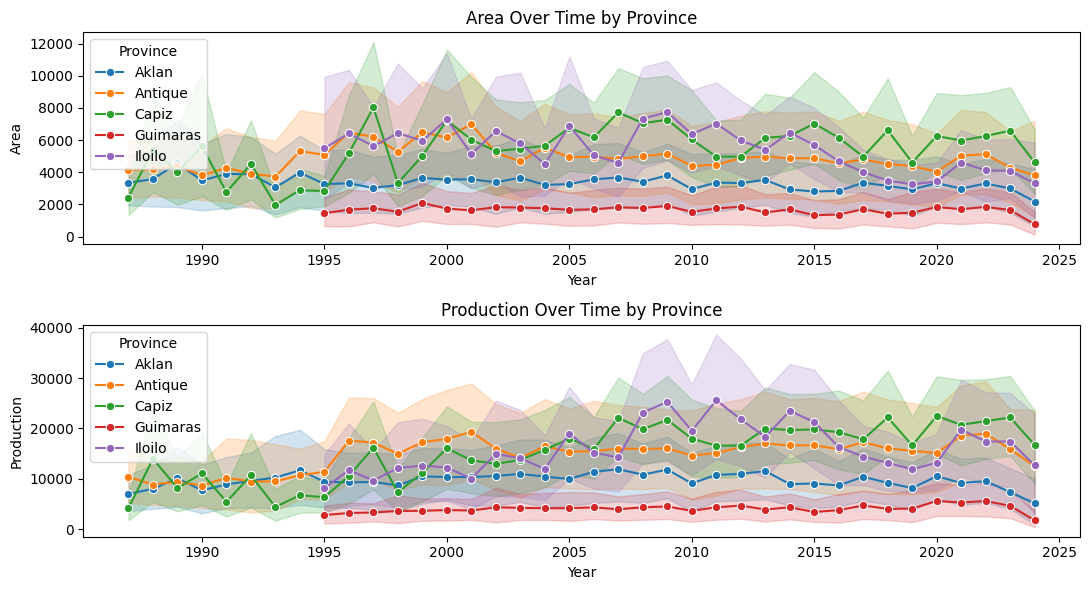

In [24]:
# plot Area and Production over time (Year)
plt.figure(figsize=(11, 6))

# plot Area over time
plt.subplot(2, 1, 1)
sns.lineplot(data=dataset, x='Year', y='Area', hue='Province', marker='o')
plt.title('Area Over Time by Province')
plt.xlabel('Year')
plt.ylabel('Area')

# plot Production over time
plt.subplot(2, 1, 2)
sns.lineplot(data=dataset, x='Year', y='Production', hue='Province', marker='o')
plt.title('Production Over Time by Province')
plt.xlabel('Year')
plt.ylabel('Production')

plt.tight_layout()
plt.show()

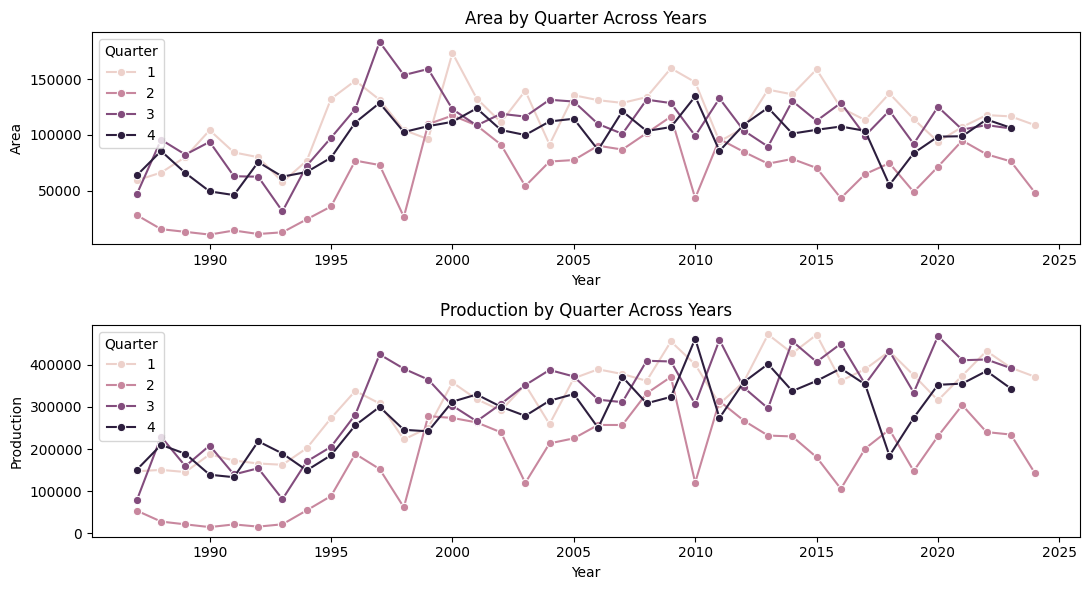

In [25]:
# aggregate data by Year and Quarter to see seasonal patterns
quarterly_data = dataset.groupby(['Year', 'Quarter'])[['Area', 'Production']].sum().reset_index()

# plot Area and Production for each quarter across the years
plt.figure(figsize=(11, 6))

# plot Area by Quarter
plt.subplot(2, 1, 1)
sns.lineplot(data=quarterly_data, x='Year', y='Area', hue='Quarter', marker='o')
plt.title('Area by Quarter Across Years')
plt.xlabel('Year')
plt.ylabel('Area')

# plot Production by Quarter
plt.subplot(2, 1, 2)
sns.lineplot(data=quarterly_data, x='Year', y='Production', hue='Quarter', marker='o')
plt.title('Production by Quarter Across Years')
plt.xlabel('Year')
plt.ylabel('Production')

plt.tight_layout()
plt.show()

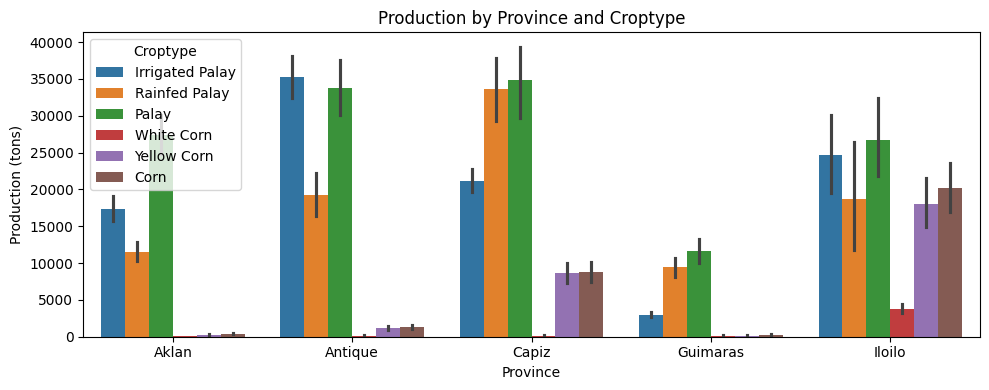

In [26]:
#\ visualizing production across Provinces with Croptype
plt.figure(figsize=(10, 4))

sns.barplot(x='Province', y='Production', hue='Croptype', data=dataset)

# adding titles and labels
plt.title('Production by Province and Croptype')
plt.xlabel('Province')
plt.ylabel('Production (tons)')

# Show the plot
plt.tight_layout()
plt.show()

                Area  Production   Quarter      Year
Area        1.000000    0.950185  0.015111 -0.024740
Production  0.950185    1.000000  0.037225  0.081674
Quarter     0.015111    0.037225  1.000000 -0.015977
Year       -0.024740    0.081674 -0.015977  1.000000


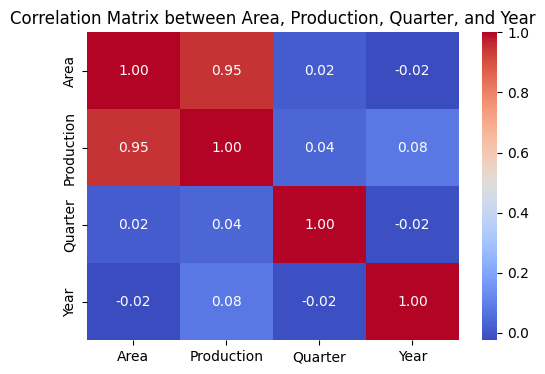

In [27]:
# calculate the correlation between Area and Production
corr = dataset[['Area', 'Production', 'Quarter', 'Year']].corr()
print(corr)

# visualize correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Area, Production, Quarter, and Year')
plt.show()

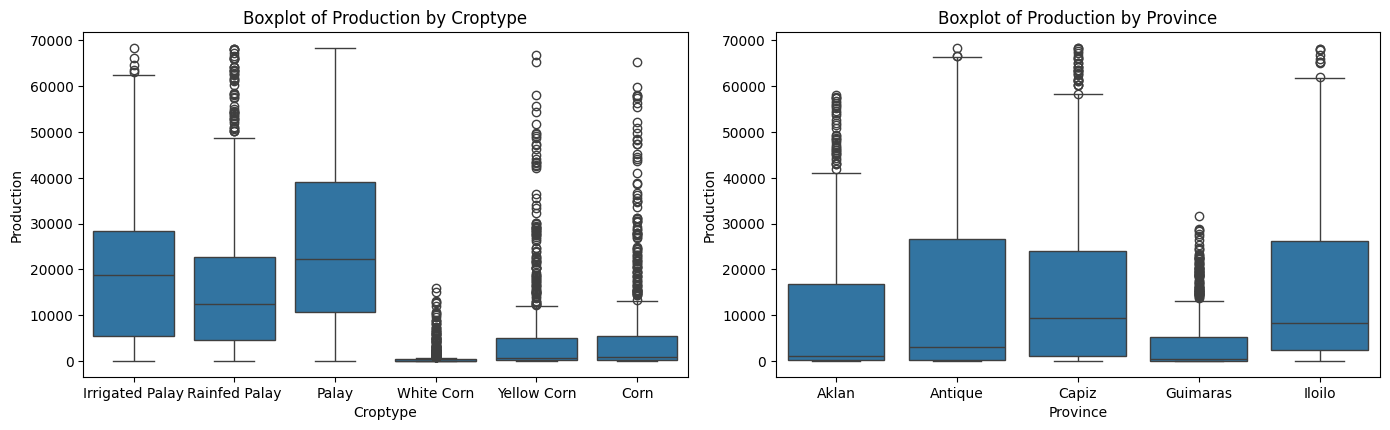

In [28]:
# Boxplot for Area and Production
plt.figure(figsize=(14, 8))

# Boxplot for Area
plt.subplot(2, 2, 1)
sns.boxplot(x='Croptype', y='Production', data=dataset)
plt.title('Boxplot of Production by Croptype')

# Boxplot for Production
plt.subplot(2, 2, 2)
sns.boxplot(x='Province', y='Production', data=dataset)
plt.title('Boxplot of Production by Province')

plt.tight_layout()
plt.show()

In [29]:
aggregated_data = dataset.groupby(['Croptype', 'Province', 'Quarter', 'Year']).agg(
    total_production=('Production', 'sum'),
    total_area=('Area', 'sum'),
).reset_index()

<h4> Feature Engineering</h4>

In [30]:
dataset = dataset.sort_values(by='Date', ascending=True)

In [31]:
# # Seasonal features
# dataset['Quarter_sin'] = np.sin(2 * np.pi * dataset['Quarter'] / 4)
# dataset['Quarter_cos'] = np.cos(2 * np.pi * dataset['Quarter'] / 4)

In [32]:
# # Create lag features
# dataset['Lag_1'] = dataset.groupby(['Province', 'Croptype', 'Quarter'])['Production'].shift(1)
# dataset['Lag_2'] = dataset.groupby(['Province', 'Croptype', 'Quarter'])['Production'].shift(2)
# dataset['Lag_3'] = dataset.groupby(['Province', 'Croptype', 'Quarter'])['Production'].shift(3)
# dataset['Lag_4'] = dataset.groupby(['Province', 'Croptype', 'Quarter'])['Production'].shift(4)

In [33]:
# # Create rolling mean features
# dataset['Rolling_Mean_1'] = dataset['Production'].rolling(window=2).mean()
# dataset['Rolling_Mean_4'] = dataset['Production'].rolling(window=4).mean()
# dataset['Rolling_Mean_2'] = dataset['Production'].rolling(window=2).mean()

In [34]:
dataset.head(5)

,Date,Croptype,Province,Quarter,Year,Area,Production
42,1987-04-01,Palay,Capiz,2,1987,2180.0,3385.0
47,1987-04-01,White Corn,Capiz,2,1987,70.0,51.0
46,1987-04-01,White Corn,Antique,2,1987,260.0,43.0
45,1987-04-01,White Corn,Aklan,2,1987,110.0,80.0
52,1987-04-01,Yellow Corn,Capiz,2,1987,240.0,292.0


In [35]:
# encoder = LabelEncoder()

# # Label encode Croptype and Province
# dataset['Croptype'] = encoder.fit_transform(dataset['Croptype'])
# dataset['Province'] = encoder.fit_transform(dataset['Province'])

encoding = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
encode_data = encoding.fit_transform(dataset[['Croptype', 'Province']])

dataset = pd.concat([dataset.reset_index(drop=True), encode_data.reset_index(drop=True)], axis=1)
dataset = dataset.drop(columns=['Croptype', 'Province'])

In [36]:
dataset['Log_Production'] = np.log(dataset['Production'] + 1)

In [37]:
dataset.head(5)

,Date,Quarter,Year,Area,Production,Croptype_Corn,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Province_Aklan,Province_Antique,Province_Capiz,Province_Guimaras,Province_Iloilo,Log_Production
0,1987-04-01,2,1987,2180.0,3385.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.127405
1,1987-04-01,2,1987,70.0,51.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.951244
2,1987-04-01,2,1987,260.0,43.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.784190
3,1987-04-01,2,1987,110.0,80.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.394449
4,1987-04-01,2,1987,240.0,292.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.680173


<h4>Split train/test</h4>

In [38]:
# initialize the scaler
scaler = StandardScaler()

X = dataset.drop(['Production', 'Log_Production', 'Date'], axis=1)
y = dataset['Log_Production']

# pplit into train and test (70% train, 30% test)
train_size = int(0.7 * len(dataset))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# fit the scaler on the training data and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# transform X_test using the same scaler (do not fit again)
X_test_scaled = scaler.transform(X_test)

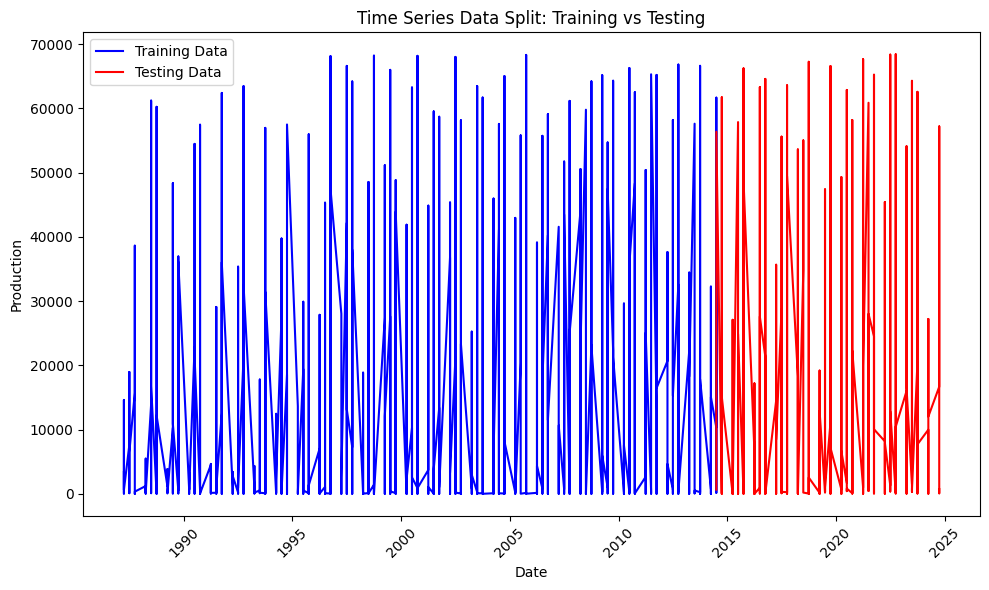

In [39]:
# Plotting the entire production data
plt.figure(figsize=(10, 6))

# Plot training data (first 70%)
plt.plot(dataset['Date'][:train_size], dataset['Production'][:train_size], label='Training Data', color='blue')

# Plot testing data (last 30%)
plt.plot(dataset['Date'][train_size:], dataset['Production'][train_size:], label='Testing Data', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Time Series Data Split: Training vs Testing')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()
plt.show()

<hr>
<h2> Implementing Machine Learning Algorithms</h2>
<hr>

<h4>Linear Regression (LR)</h4>

In [40]:
linearRegression = LinearRegression(fit_intercept = True)
linearRegression.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
# Evaluate the model on the test set
y_pred = linearRegression.predict(X_test_scaled)

In [42]:
y_pred_original = np.exp(y_pred) - 1
y_test_original = np.exp(y_test) - 1

In [43]:
results = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original})
results.head(5)

,Actual,Predicted
2460,651.0,397.751447
2461,18904.0,7559.874043
2462,952.0,723.164061
2463,742.0,305.038474
2464,56358.0,43900.290100


<h4> Crossfold Validation </>

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

CV  = KFold(n_splits= 10, random_state=42, shuffle=True)
scores = cross_val_score(linearRegression, X_train_scaled, y_train, cv=CV)
print(scores)

print(f'Mean Scores: {scores.mean()}')

[0.80746296 0.75474267 0.76544204 0.78603989 0.78444653 0.76060819
 0.78674268 0.76144606 0.7757029  0.77375492]
Mean Scores: 0.7756388853080141


<h4> ShuffleSplit </>

In [45]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

CV1 = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)
cross_val_score(linearRegression, X_train_scaled, y_train, cv=CV1)
print(scores)

print(f'Mean Scores: {scores.mean()}')

[0.80746296 0.75474267 0.76544204 0.78603989 0.78444653 0.76060819
 0.78674268 0.76144606 0.7757029  0.77375492]
Mean Scores: 0.7756388853080141


### Checked using GridSearchCV the optimal hyperparameters for linear regression using L1,L2 Regularization and the combination which is Elastic Net

In [75]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import pandas as pd

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

def find_best_model_using_gridsearchcv(x, y):
    algorithms = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'copy_X': [True, False]
            }
        },
        'ridge_regression': {
            'model': Ridge(),
            'params': {
                'alpha': [0.01, 0.1, 1, 10, 100],
                'solver': ['auto', 'svd', 'lsqr', 'cholesky', 'saga'],
                'max_iter': [1000, 2000, 3000,5000,10000],
                'tol': [1e-3, 1e-4, 1e-5]
            }
        },
        'lasso_regression': {
            'model': Lasso(),
            'params': {
                'alpha': [0.01, 0.1, 1, 10, 100],
                'selection': ['cyclic', 'random'],
                'max_iter': [1000, 2000],
                'tol': [1e-3, 1e-4, 1e-5]
            }
        },
        'elastic_net_regression': {
            'model': ElasticNet(),
            'params': {
                'alpha': [0.01, 0.1, 1, 10, 100],
                'l1_ratio': [0.1, 0.5, 0.9],
                'selection': ['cyclic', 'random'],
                'max_iter': [1000, 2000],
                'tol': [1e-3, 1e-4, 1e-5]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

    for algo_name, config in algorithms.items():

        # perform GridSearchCV for each model
        grid_search = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        grid_search.fit(x, y)

        # store results
        scores.append({
            'model': algo_name,
            'best_score': grid_search.best_score_,
            'best_params': grid_search.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])



In [76]:
# runs the grid search
grid_search_results = find_best_model_using_gridsearchcv(X_train_scaled, y_train)
grid_search_results

pd.set_option('display.max_colwidth', None)
grid_search_results

,model,best_score,best_params
0,linear_regression,0.782693,"{'copy_X': True, 'fit_intercept': True}"
1,ridge_regression,0.783205,"{'alpha': 0.1, 'max_iter': 5000, 'solver': 'saga', 'tol': 0.001}"
2,lasso_regression,0.783388,"{'alpha': 0.01, 'max_iter': 1000, 'selection': 'random', 'tol': 0.001}"
3,elastic_net_regression,0.783377,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1000, 'selection': 'random', 'tol': 0.001}"


lasso and elastic net has best scores & then these parameters were applied

In [48]:
# Calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original, y_pred_original)
mse_train = mean_squared_error(y_test_original, y_pred_original)
r2_train = r2_score(y_test_original, y_pred_original)
mape = np.mean(np.abs((y_test_original - y_pred_original) / y_test_original) * 100)

# Create a DataFrame to store the results
performance_lr = pd.DataFrame({
    'Model': ['MAE', 'MSE', 'MAPE', 'R²'],
    'Linear Regression': [mae_train, mse_train, mape, r2_train]
})

# Transpose to make the performance horizontal
performance_lr = performance_lr.set_index('Model').T

# Display the DataFrame
performance_lr

Model,MAE,MSE,MAPE,R²
Linear Regression,16636.083652,4.964624e+09,301.91084,-16.661463


In [49]:
# import matplotlib.pyplot as plt

# # Plot feature importance
# xgb.plot_importance(model_xgb)
# plt.show()

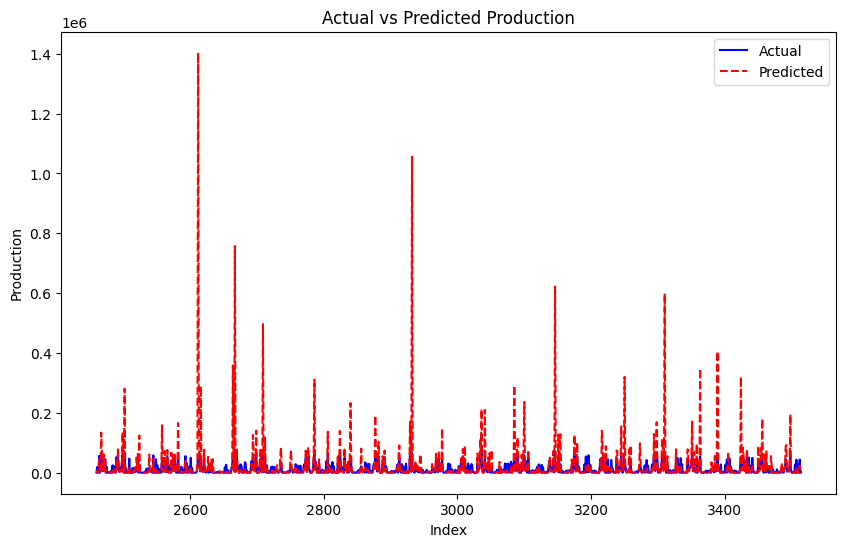

In [50]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original.index, y_test_original, label='Actual', color='blue')
plt.plot(y_test_original.index, y_pred_original, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Actual vs Predicted Production')
plt.show()

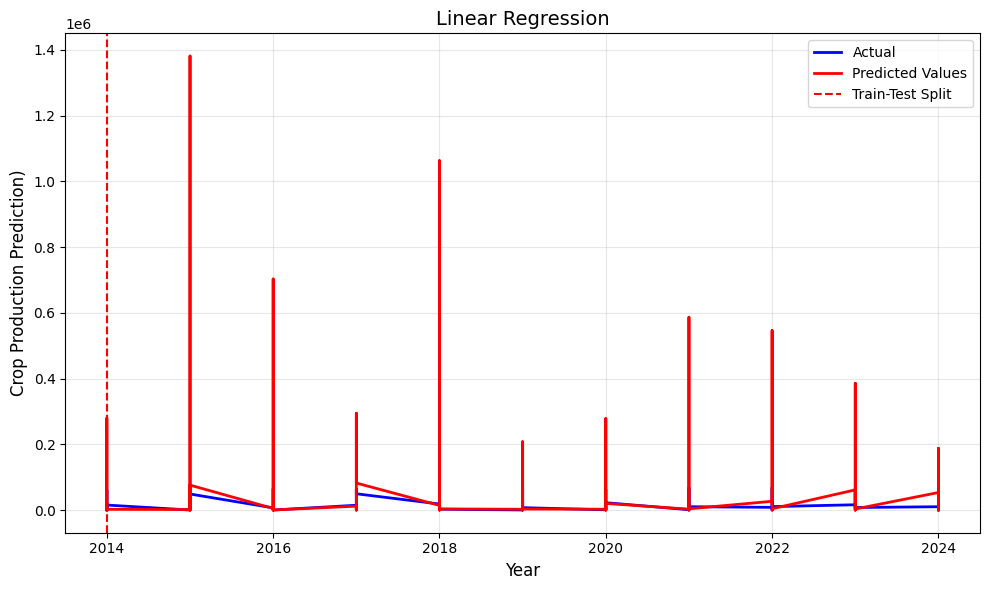

In [71]:
test_df = X_test.copy()
test_df['Actual'] = y_test_original
test_df['Predicted'] = y_pred_original

# extract the corresponding test set years
test_df['Year'] = dataset.loc[X_test.index, 'Date'].dt.year  # Assuming 'Date' is datetime
test_years = test_df['Year']

# Plot only the test set
plt.figure(figsize=(10, 6))
plt.plot(test_years, test_df['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(test_years, test_df['Predicted'], label='Predicted Values', color='red', linewidth=2)

# vertical line for test set
start_test_year = test_years.min()
plt.axvline(start_test_year, color='red', linestyle='--', linewidth=1.5, label='Train-Test Split')

# add title, labels, and legend
plt.title('Linear Regression', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production Prediction)', fontsize=12)
plt.legend(loc='best', fontsize=10)


plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<h4>Linear Regression Ridge</h4>

In [77]:
# ridge_regression	0.783210	{'alpha': 1, 'max_iter': 2000, 'solver': 'saga', 'tol': 0.001}

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1, max_iter=5000, solver='saga', tol=0.001)
ridge.fit(X_train_scaled, y_train)


Ridge(alpha=1, max_iter=5000, solver='saga', tol=0.001)

In [78]:
# make predictions
y_pred_ridge = ridge.predict(X_test_scaled)

In [79]:
y_pred_original_ridge = np.exp(y_pred_ridge) - 1
y_test_original_ridge = np.exp(y_test) - 1

In [80]:
results = pd.DataFrame({'Actual': y_test_original_ridge, 'Predicted': y_pred_original_ridge})
results.head(5)

,Actual,Predicted
2460,651.0,395.295466
2461,18904.0,7455.160167
2462,952.0,713.416477
2463,742.0,298.338364
2464,56358.0,43237.996040


In [86]:
# Calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original_ridge, y_pred_original_ridge)
mse_train = mean_squared_error(y_test_original_ridge, y_pred_original_ridge)
r2_train = r2_score(y_test_original_ridge, y_pred_original_ridge)
mape = np.mean(np.abs((y_test_original_ridge - y_pred_original_ridge) / y_test_original_ridge) * 100)

# Create a DataFrame to store the results
performance_ridge = pd.DataFrame({
    'Model': ['MAE', 'MSE', 'MAPE', 'R²'],
    'Ridge Regression': [mae_train, mse_train, mape, r2_train]
})

# Transpose to make the performance horizontal
performance_ridge = performance_ridge.set_index('Model').T

# Display the DataFrame
performance_ridge

Model,MAE,MSE,MAPE,R²
Ridge Regression,16612.400287,4.962136e+09,300.088373,-16.652611


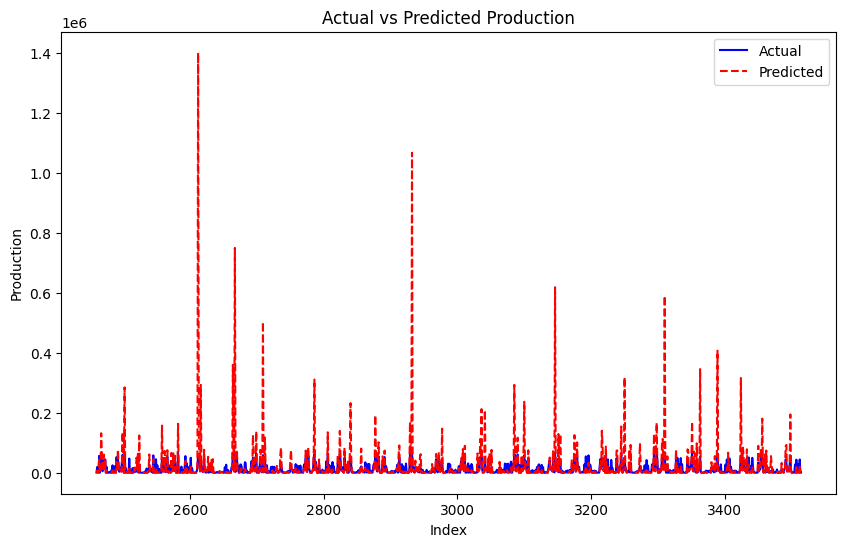

In [88]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_ridge.index, y_test_original_ridge, label='Actual', color='blue')
plt.plot(y_test_original_ridge.index, y_pred_original_ridge, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Actual vs Predicted Production')
plt.show()

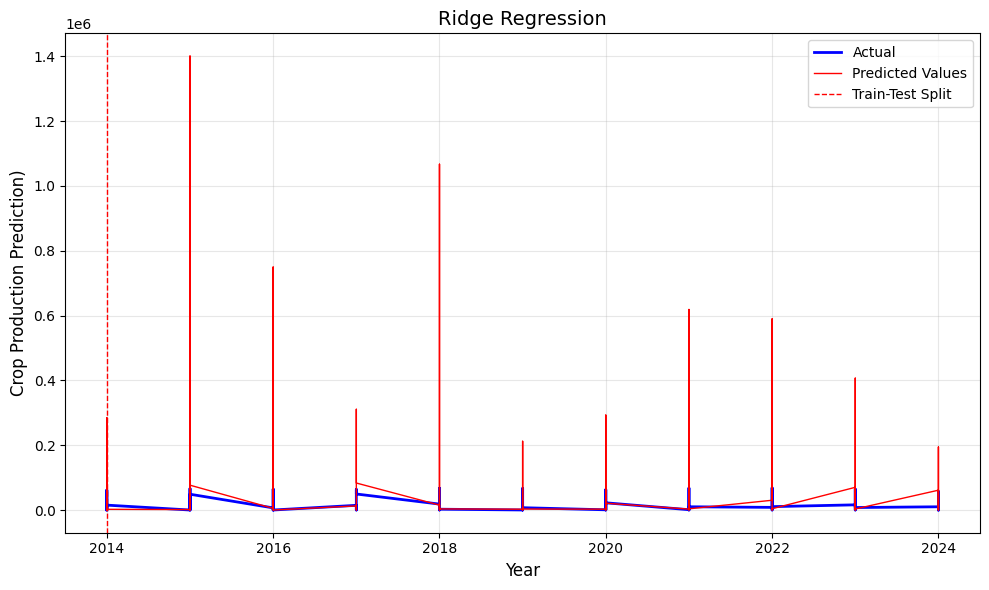

In [100]:
test_df = X_test.copy()
test_df['Actual'] = y_test_original_ridge
test_df['Predicted'] = y_pred_original_ridge

# extract the corresponding test set years
test_df['Year'] = dataset.loc[X_test.index, 'Date'].dt.year  # Assuming 'Date' is datetime
test_years = test_df['Year']

# Plot only the test set
plt.figure(figsize=(10, 6))
plt.plot(test_years, test_df['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(test_years, test_df['Predicted'], label='Predicted Values', color='red', linewidth=1)

# vertical line test set
start_test_year = test_years.min()
plt.axvline(start_test_year, color='red', linestyle='--', linewidth=1, label='Train-Test Split')

# Add title, labels, and legend
plt.title('Ridge Regression', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production Prediction)', fontsize=12)
plt.legend(loc='best', fontsize=10)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<h4> Lasso Regression </>

In [90]:
# lasso_regression	0.783360	{'alpha': 0.01, 'max_iter': 2000, 'selection': 'random', 'tol': 0.001}

from sklearn.linear_model import Lasso

lasso = Lasso(alpha= 0.01, max_iter=2000, selection='random', tol=0.001)
lasso.fit(X_train_scaled, y_train)


Lasso(alpha=0.01, max_iter=2000, selection='random', tol=0.001)

In [91]:
# make predictions
y_pred_lasso = lasso.predict(X_test_scaled)

In [92]:
y_pred_original_lasso = np.exp(y_pred_lasso) - 1
y_test_original_lasso = np.exp(y_test) - 1

In [93]:
results = pd.DataFrame({'Actual': y_test_original_lasso, 'Predicted': y_pred_original_lasso})
results.head(5)

,Actual,Predicted
2460,651.0,397.728067
2461,18904.0,7212.678192
2462,952.0,697.410228
2463,742.0,305.238413
2464,56358.0,42608.495344


In [94]:
# Calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original_lasso, y_pred_original_lasso)
mse_train = mean_squared_error(y_test_original_lasso, y_pred_original_lasso)
r2_train = r2_score(y_test_original_lasso, y_pred_original_lasso)
mape = np.mean(np.abs((y_test_original_lasso - y_pred_original) / y_test_original_lasso) * 100)

# Create a DataFrame to store the results
performance_lasso = pd.DataFrame({
    'Model': ['MAE', 'MSE', 'MAPE', 'R²'],
    'Lasso Regression': [mae_train, mse_train, mape, r2_train]
})

# Transpose to make the performance horizontal
performance_lasso = performance_lasso.set_index('Model').T

# Display the DataFrame
performance_lasso

Model,MAE,MSE,MAPE,R²
Lasso Regression,15700.653408,4.608119e+09,297.074017,-15.393209


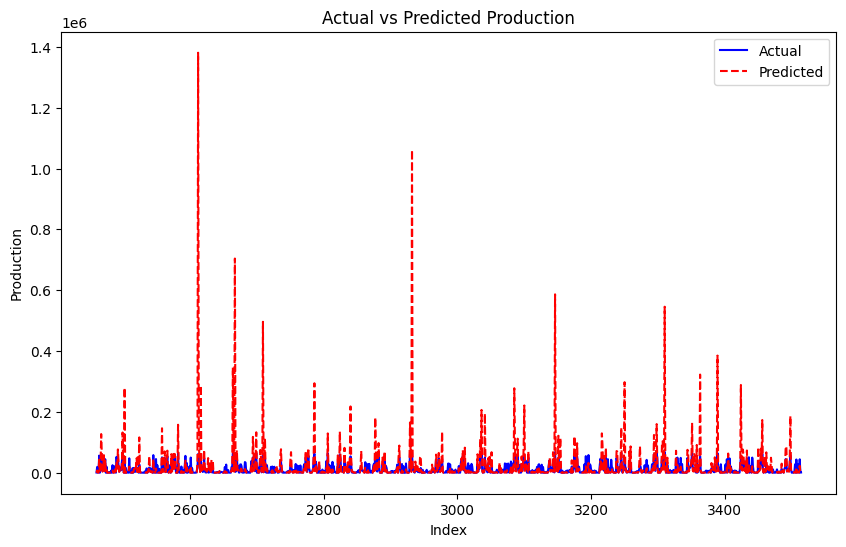

In [95]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original.index, y_test_original_lasso, label='Actual', color='blue')
plt.plot(y_test_original.index, y_pred_original_lasso, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Actual vs Predicted Production')
plt.show()

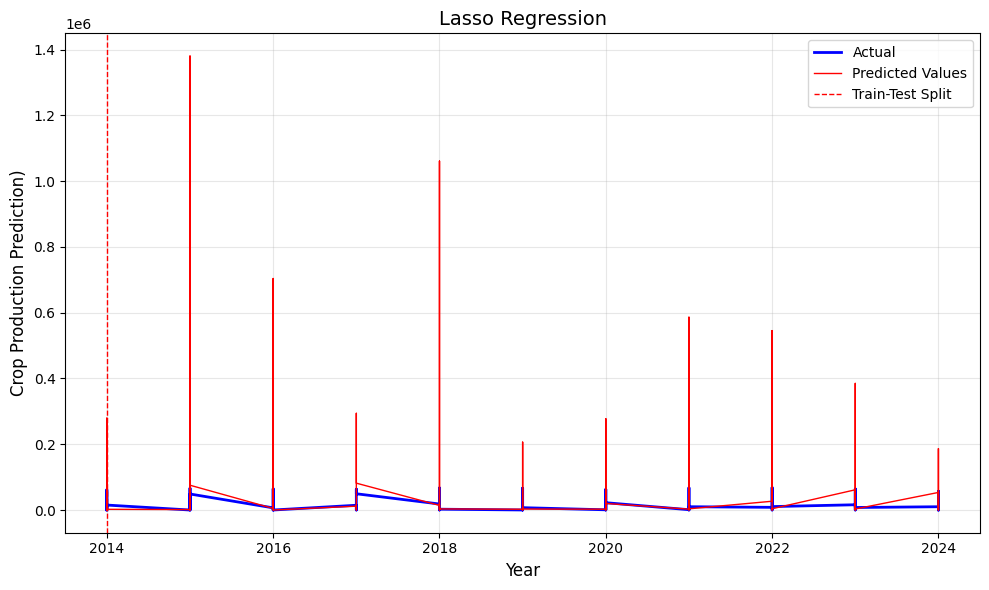

In [101]:
test_df = X_test.copy()
test_df['Actual'] = y_test_original_lasso
test_df['Predicted'] = y_pred_original_lasso

# extract the corresponding test set years
test_df['Year'] = dataset.loc[X_test.index, 'Date'].dt.year  # Assuming 'Date' is datetime
test_years = test_df['Year']

# Plot only the test set
plt.figure(figsize=(10, 6))
plt.plot(test_years, test_df['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(test_years, test_df['Predicted'], label='Predicted Values', color='red', linewidth=1)

# Add a vertical line indicating the start of the test set
start_test_year = test_years.min()
plt.axvline(start_test_year, color='red', linestyle='--', linewidth=1, label='Train-Test Split')

# Add title, labels, and legend
plt.title('Lasso Regression', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production Prediction)', fontsize=12)
plt.legend(loc='best', fontsize=10)

# Customize grid and layout
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the plot
plt.show()


# Elastic Net

In [107]:
# elastic_net_regression	0.783377	{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1000, 'selection': 'random', 'tol': 0.001}
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha= 0.01, l1_ratio= 0.9, max_iter = 1000, selection='random', tol=0.001)
elastic_net.fit(X_train_scaled, y_train)


ElasticNet(alpha=0.01, l1_ratio=0.9, selection='random', tol=0.001)

In [108]:
# make predictions
y_pred_elasticNet = elastic_net.predict(X_test_scaled) # Use the trained instance of ElasticNet

In [109]:
y_pred_original_elastic = np.exp(y_pred_lasso) - 1
y_test_original_elastic = np.exp(y_test) - 1

In [110]:
results = pd.DataFrame({'Actual': y_test_original_elastic, 'Predicted': y_pred_original_elastic})
results.head(5)

,Actual,Predicted
2460,651.0,397.728067
2461,18904.0,7212.678192
2462,952.0,697.410228
2463,742.0,305.238413
2464,56358.0,42608.495344


In [115]:
# Calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original_elastic, y_pred_original_elastic)
mse_train = mean_squared_error(y_test_original_elastic, y_pred_original_elastic)
r2_train = r2_score(y_test_original_elastic, y_pred_original_elastic)
mape = np.mean(np.abs((y_test_original_elastic - y_pred_original_elastic) / y_test_original_elastic) * 100)

# Create a DataFrame to store the results
performance_elastic = pd.DataFrame({
    'Model': ['MAE', 'MSE', 'MAPE', 'R²'],
    'Elastic Net': [mae_train, mse_train, mape, r2_train]
})

# Transpose to make the performance horizontal
performance_elastic = performance_elastic.set_index('Model').T

# Display the DataFrame
performance_elastic

Model,MAE,MSE,MAPE,R²
Elastic Net,15700.653408,4.608119e+09,297.08618,-15.393209


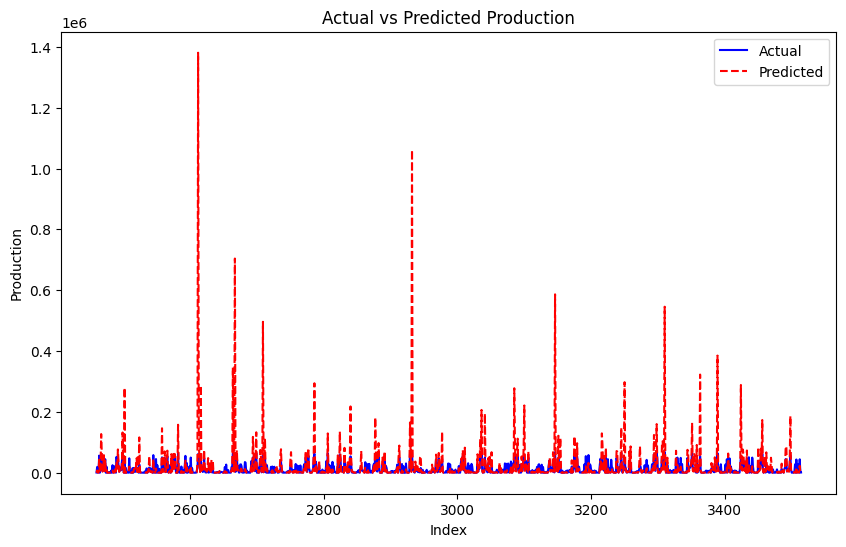

In [112]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_elastic.index, y_test_original_elastic, label='Actual', color='blue')
plt.plot(y_test_original_elastic.index, y_pred_original_elastic, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Actual vs Predicted Production')
plt.show()

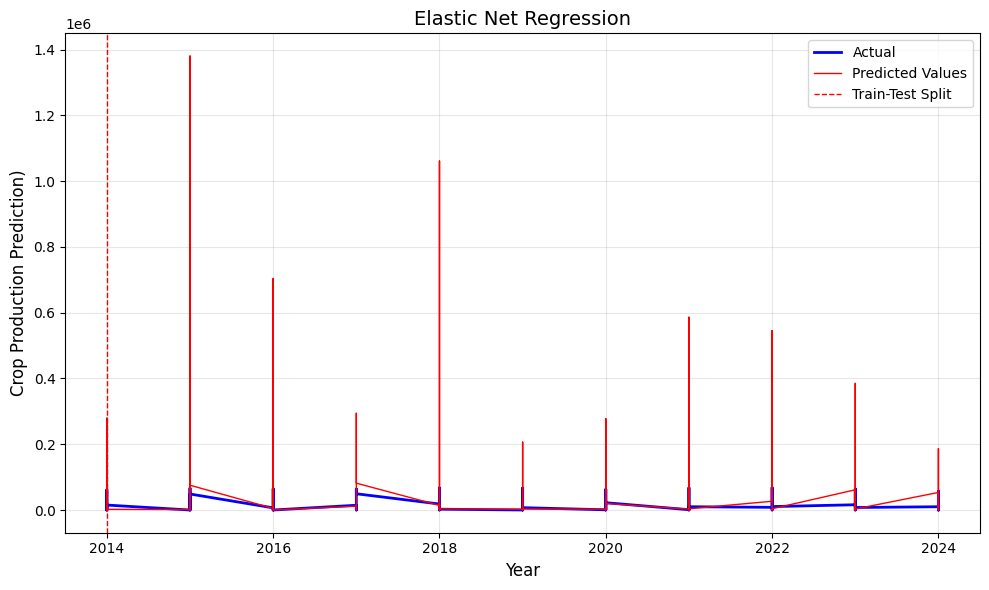

In [113]:
test_df = X_test.copy()
test_df['Actual'] = y_test_original_elastic
test_df['Predicted'] = y_pred_original_elastic

# extract the corresponding test set years
test_df['Year'] = dataset.loc[X_test.index, 'Date'].dt.year  # Assuming 'Date' is datetime
test_years = test_df['Year']

# Plot only the test set
plt.figure(figsize=(10, 6))
plt.plot(test_years, test_df['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(test_years, test_df['Predicted'], label='Predicted Values', color='red', linewidth=1)

# Add a vertical line indicating the start of the test set
start_test_year = test_years.min()
plt.axvline(start_test_year, color='red', linestyle='--', linewidth=1, label='Train-Test Split')

# Add title, labels, and legend
plt.title('Elastic Net Regression', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production Prediction)', fontsize=12)
plt.legend(loc='best', fontsize=10)

# Customize grid and layout
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the plot
plt.show()


In [118]:
# merged
merged_performance_LR = pd.concat([performance_lr, performance_lasso, performance_ridge, performance_elastic], axis=0)
merged_performance_LR

Model,MAE,MSE,MAPE,R²
Linear Regression,16636.083652,4.964624e+09,301.910840,-16.661463
Lasso Regression,15700.653408,4.608119e+09,297.086180,-15.393209
Ridge Regression,16612.400287,4.962136e+09,300.088373,-16.652611
Elastic Net,15700.653408,4.608119e+09,297.086180,-15.393209


<h4>Support Vector Regression</h4>

 customize various parameters such as the kernel type, regularization parameter, and kernel-specific parameters to improve model performance.

In [122]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline

SVR_reg = make_pipeline(
    LinearSVR(random_state=0, tol=1e-5)  # LinearSVR with small tolerance
)


In [123]:

# Train the model on training data
SVR_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr = SVR_reg.predict(X_test_scaled)

In [124]:
y_pred_original_svr = np.exp(y_pred_svr) - 1
y_test_original_svr = np.exp(y_test) - 1

In [125]:
results = pd.DataFrame({'Actual': y_test_original_svr, 'Predicted': y_pred_original_svr})
results.head(5)

,Actual,Predicted
2460,651.0,445.740545
2461,18904.0,10143.459423
2462,952.0,638.533324
2463,742.0,367.625875
2464,56358.0,47011.437147


In [126]:
# Calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original_svr, y_pred_original_svr)
mse_train = mean_squared_error(y_test_original_svr, y_pred_original_svr)
r2_train = r2_score(y_test_original_svr, y_pred_original_svr)
mape = np.mean(np.abs((y_test_original_svr - y_pred_original_svr) / y_test_original_svr) * 100)

# Create a DataFrame to store the results
performance_svr = pd.DataFrame({
    'Model': ['MAE', 'MSE', 'MAPE', 'R²'],
    'SVR': [mae_train, mse_train, mape, r2_train]
})

# Transpose to make the performance horizontal
performance_svr = performance_svr.set_index('Model').T

# Display the DataFrame
performance_svr

Model,MAE,MSE,MAPE,R²
SVR,12904.214193,2.600392e+09,370.480726,-8.250796


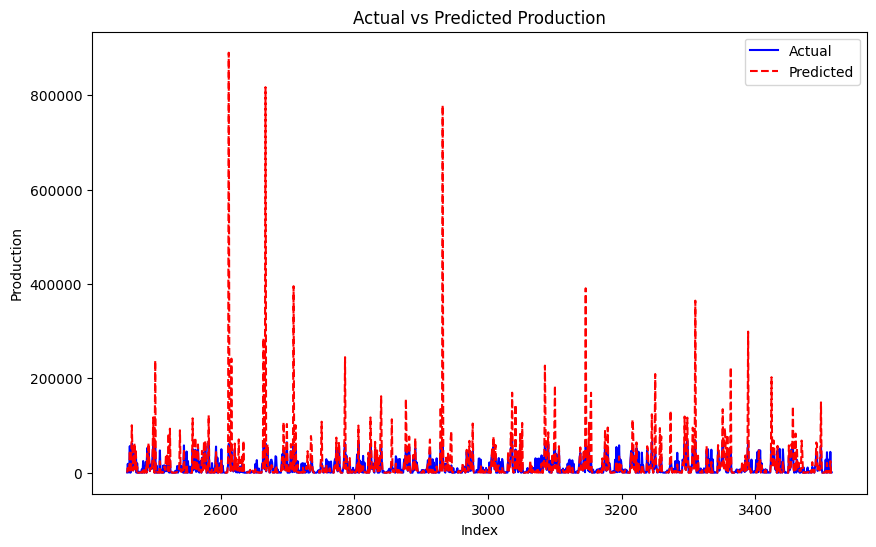

In [135]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_svr.index, y_test_original_svr, label='Actual', color='blue')
plt.plot(y_test_original_svr.index, y_pred_original_svr, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Actual vs Predicted Production')
plt.show()

checked the performance actual vs. predicted in test data

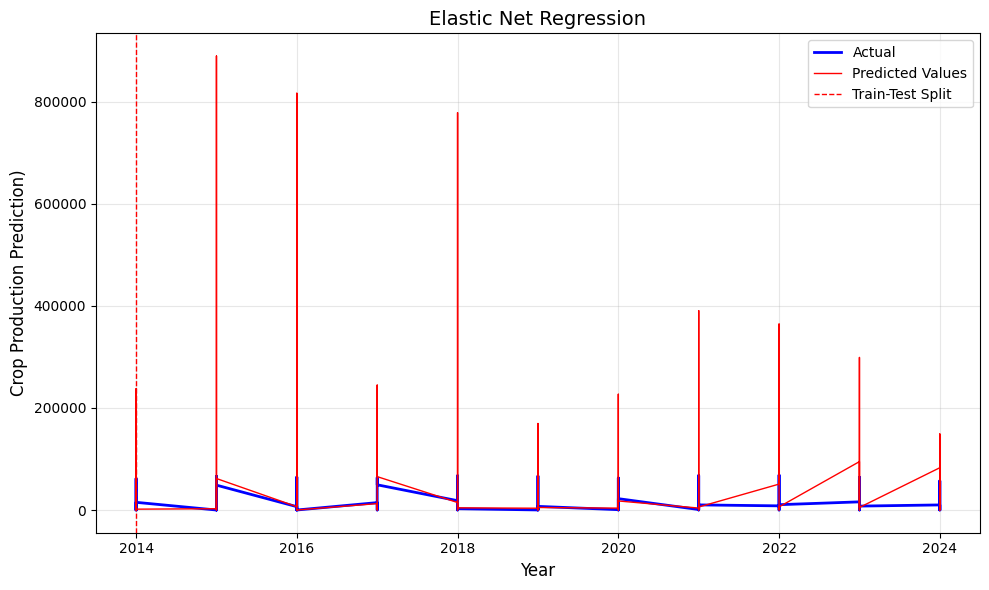

In [136]:


test_df = X_test.copy()
test_df['Actual'] = y_test_original_svr
test_df['Predicted'] = y_pred_original_svr

# extract test set
test_df['Year'] = dataset.loc[X_test.index, 'Date'].dt.year
test_years = test_df['Year']

# plots the test set
plt.figure(figsize=(10, 6))
plt.plot(test_years, test_df['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(test_years, test_df['Predicted'], label='Predicted Values', color='red', linewidth=1)

# vertical line test set indicator
start_test_year = test_years.min()
plt.axvline(start_test_year, color='red', linestyle='--', linewidth=1, label='Train-Test Split')

# adds title, labels, and legend
plt.title('Elastic Net Regression', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production Prediction)', fontsize=12)
plt.legend(loc='best', fontsize=10)


plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
'''
param_grid = {
     'C': [1, 10, 50, 100],
     'epsilon': [0.01, 0.1, 0.2, 0.5],
     'kernel': ['rbf', 'linear', 'poly']
}

# Create a GridSearchCV object to search for the best hyperparameters
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Best parameter combination found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

# Use the best model found by GridSearchCV
model_svr = grid_search.best_estimator_

'''

In [171]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define hyperparameter distribution for random search
param_dist = {
    'C': uniform(1, 100),  # Use a smaller range for C
    'epsilon': uniform(0.01, 0.2),  # Limit epsilon values
    'kernel': ['rbf', 'linear'],  # Limit kernel types
    'gamma': ['scale', 'auto']  # Common gamma options
}

# Use RandomizedSearchCV to randomly sample hyperparameters (20 iterations)
random_search = RandomizedSearchCV(SVR(), param_dist, n_iter=20, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

# Use the best model
model_svr = random_search.best_estimator_

In [172]:
# Display best parameters
best_parameter = pd.DataFrame(random_search.best_params_, index=['Best Parameters'])
best_paramter

,C,epsilon,gamma,kernel
Best Parameters,1,0.01,auto,rbf


In [173]:
# Best Parameters	1	0.01	auto	rbf
SVR_reg1 = make_pipeline(
    SVR(C= 1 , epsilon= 0.01, gamma='auto', kernel='rbf')
)

In [174]:
# Train the model on training data
SVR_reg1.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr1 = SVR_reg1.predict(X_test_scaled)

In [175]:
y_pred_original_svr1 = np.exp(y_pred_svr1) - 1
y_test_original_svr1 = np.exp(y_test) - 1

In [176]:
results = pd.DataFrame({'Actual': y_test_original_svr1, 'Predicted': y_pred_original_svr1})
results.head(5)

,Actual,Predicted
2460,651.0,550.903442
2461,18904.0,15522.534357
2462,952.0,1027.864991
2463,742.0,247.087773
2464,56358.0,68831.833789


In [177]:
# Calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original_svr1, y_pred_original_svr1)
mse_train = mean_squared_error(y_test_original_svr1, y_pred_original_svr1)
r2_train = r2_score(y_test_original_svr1, y_pred_original_svr1)
mape = np.mean(np.abs((y_test_original_svr1 - y_pred_original_svr1) / y_test_original_svr1) * 100)

# Create a DataFrame to store the results
performance_svr1 = pd.DataFrame({
    'Model': ['MAE', 'MSE', 'MAPE', 'R²'],
    'SVR Randomized Search': [mae_train, mse_train, mape, r2_train]
})

# Transpose to make the performance horizontal
performance_svr1 = performance_svr1.set_index('Model').T

# Display the DataFrame
performance_svr1

Model,MAE,MSE,MAPE,R²
SVR Randomized Search,2757.867698,2.569962e+07,205.627962,0.908575


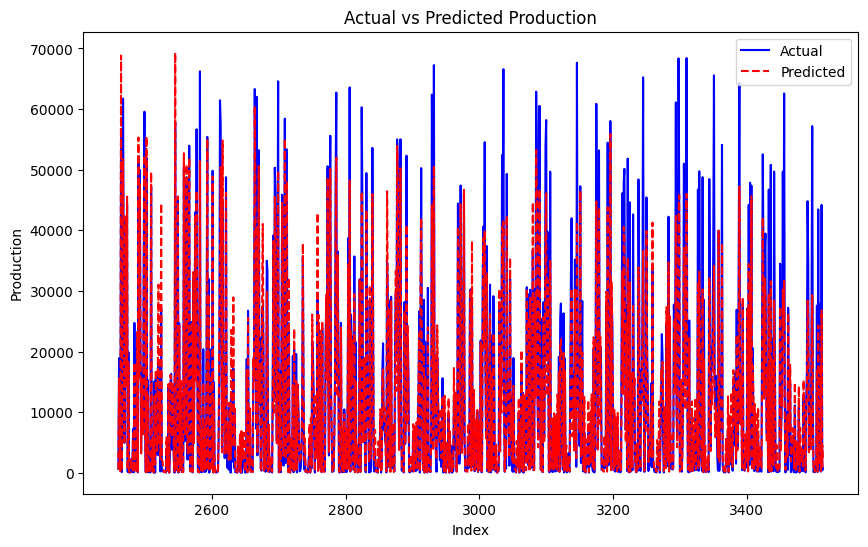

In [179]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_svr1.index, y_test_original_svr1, label='Actual', color='blue')
plt.plot(y_test_original_svr1.index, y_pred_original_svr1, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Actual vs Predicted Production')
plt.show()

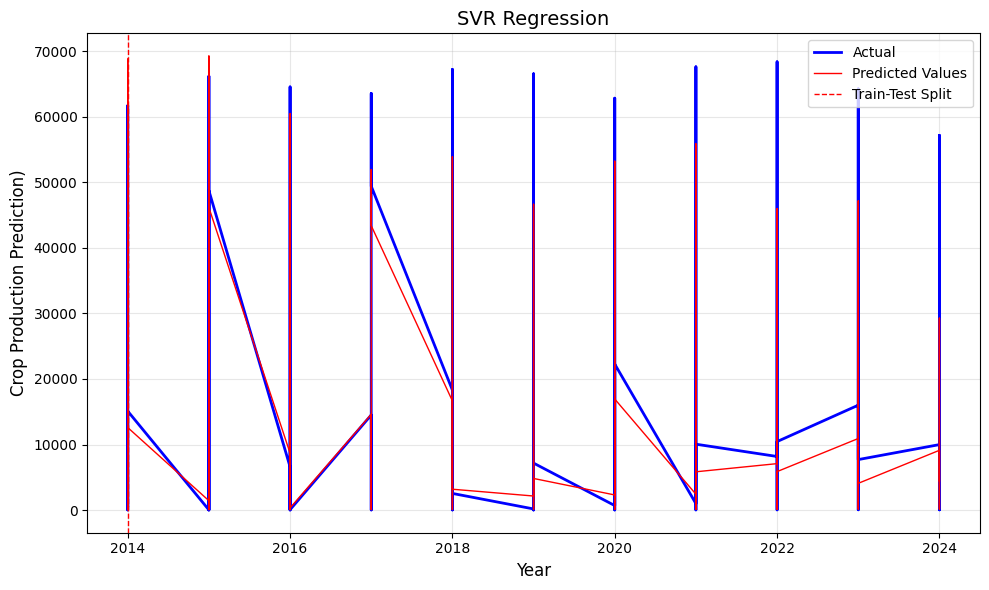

In [180]:
test_df = X_test.copy()
test_df['Actual'] = y_test_original_svr1
test_df['Predicted'] = y_pred_original_svr1

# extract the corresponding test set years
test_df['Year'] = dataset.loc[X_test.index, 'Date'].dt.year  # Assuming 'Date' is datetime
test_years = test_df['Year']

# Plot only the test set
plt.figure(figsize=(10, 6))
plt.plot(test_years, test_df['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(test_years, test_df['Predicted'], label='Predicted Values', color='red', linewidth=1)

# Add a vertical line indicating the start of the test set
start_test_year = test_years.min()
plt.axvline(start_test_year, color='red', linestyle='--', linewidth=1, label='Train-Test Split')

# Add title, labels, and legend
plt.title('SVR Regression', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production Prediction)', fontsize=12)
plt.legend(loc='best', fontsize=10)

# Customize grid and layout
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# hyperparameters
param_grid = {
    'C': [1, 10, 50, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto']
}


grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# fit training data
grid_search.fit(X_train_scaled, y_train)

# use best model
model_svr = grid_search.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [167]:
best_paramter = pd.DataFrame(grid_search.best_params_, index=['Best Parameters'])
best_paramter

,C,epsilon,gamma,kernel
Best Parameters,1,0.01,auto,rbf


In [148]:
SVR_reg2 = make_pipeline(
    SVR(C=1, epsilon=0.01, gamma='auto', kernel='rbf')
)

In [149]:
# Train the model on training data
SVR_reg2.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svr2 = SVR_reg2.predict(X_test_scaled)

In [150]:
y_pred_original_svr2 = np.exp(y_pred_svr2) - 1
y_test_original_svr2 = np.exp(y_test) - 1

In [151]:
results = pd.DataFrame({'Actual': y_test_original_svr2, 'Predicted': y_pred_original_svr2})
results.head(5)

,Actual,Predicted
2460,651.0,550.903442
2461,18904.0,15522.534357
2462,952.0,1027.864991
2463,742.0,247.087773
2464,56358.0,68831.833789


In [152]:
# Calculate performance metrics on the test data
mae_train = mean_absolute_error(y_test_original_svr2, y_pred_original_svr2)
mse_train = mean_squared_error(y_test_original_svr2, y_pred_original_svr2)
r2_train = r2_score(y_test_original_svr2, y_pred_original_svr2)
mape = np.mean(np.abs((y_test_original_svr2 - y_pred_original_svr2) / y_test_original_svr2) * 100)

# Create a DataFrame to store the results
performance_svr2 = pd.DataFrame({
    'Model': ['MAE', 'MSE', 'MAPE', 'R²'],
    'SVR GridSearch': [mae_train, mse_train, mape, r2_train]
})

# Transpose to make the performance horizontal
performance_svr2 = performance_svr2.set_index('Model').T

# Display the DataFrame
performance_svr2

Model,MAE,MSE,MAPE,R²
SVR GridSearch,2757.867698,2.569962e+07,205.627962,0.908575


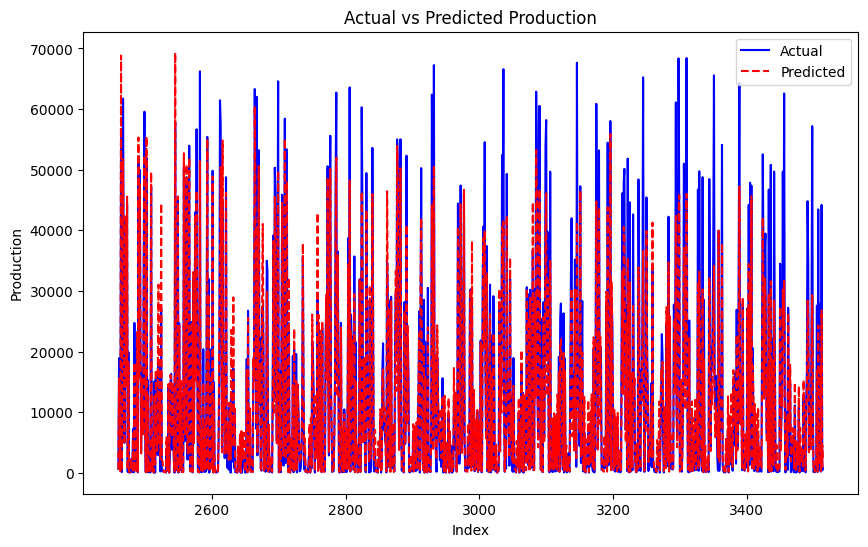

In [154]:
# 6. Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_svr2.index, y_test_original_svr2, label='Actual', color='blue')
plt.plot(y_test_original_svr2.index, y_pred_original_svr2, label='Predicted', color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Production')
plt.legend()
plt.title('Actual vs Predicted Production')
plt.show()

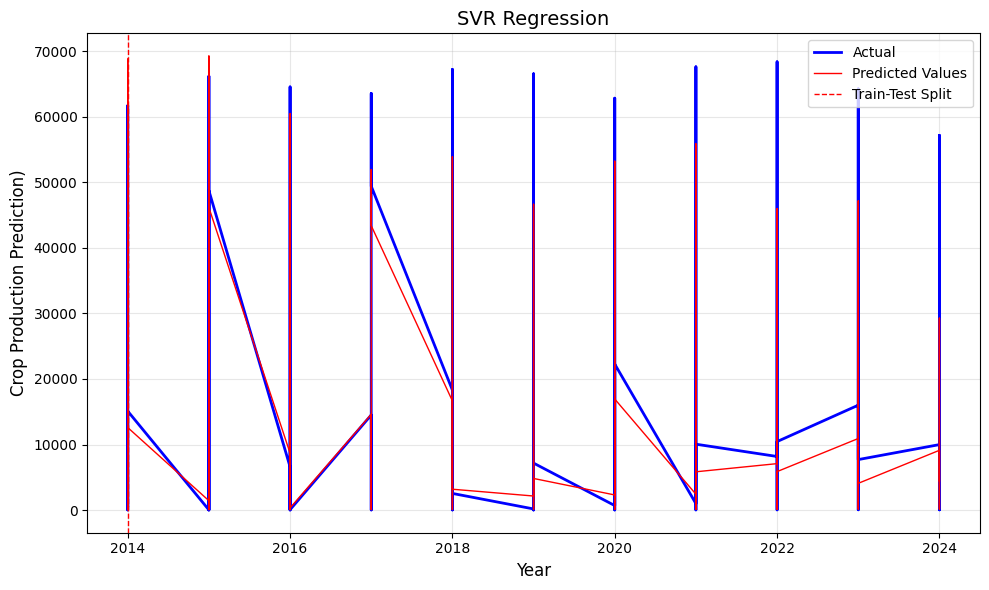

In [153]:
test_df = X_test.copy()
test_df['Actual'] = y_test_original_svr2
test_df['Predicted'] = y_pred_original_svr2

# extract the corresponding test set years
test_df['Year'] = dataset.loc[X_test.index, 'Date'].dt.year  # Assuming 'Date' is datetime
test_years = test_df['Year']

# Plot only the test set
plt.figure(figsize=(10, 6))
plt.plot(test_years, test_df['Actual'], label='Actual', color='blue', linewidth=2)
plt.plot(test_years, test_df['Predicted'], label='Predicted Values', color='red', linewidth=1)

# Add a vertical line indicating the start of the test set
start_test_year = test_years.min()
plt.axvline(start_test_year, color='red', linestyle='--', linewidth=1, label='Train-Test Split')

# Add title, labels, and legend
plt.title('SVR Regression', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Crop Production Prediction)', fontsize=12)
plt.legend(loc='best', fontsize=10)

# Customize grid and layout
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the plot
plt.show()


In [ ]:
merged_performance_SVR = pd.concat([performance_svr, performance_svr1, performance_svr2], axis=0)

In [159]:
merged_performance_SVR

Model,MAE,MSE,MAPE,R²
SVR,12904.214193,2.600392e+09,370.480726,-8.250796
SVR Randomized Search,4260.252941,6.955935e+07,68.889225,0.752545
SVR GridSearch,2757.867698,2.569962e+07,205.627962,0.908575


In [161]:
merged_SVR_LR = pd.concat([merged_performance_LR, merged_performance_SVR], axis=0)
merged_SVR_LR

Model,MAE,MSE,MAPE,R²
Linear Regression,16636.083652,4.964624e+09,301.910840,-16.661463
Lasso Regression,15700.653408,4.608119e+09,297.086180,-15.393209
Ridge Regression,16612.400287,4.962136e+09,300.088373,-16.652611
Elastic Net,15700.653408,4.608119e+09,297.086180,-15.393209
SVR,12904.214193,2.600392e+09,370.480726,-8.250796
SVR Randomized Search,4260.252941,6.955935e+07,68.889225,0.752545
SVR GridSearch,2757.867698,2.569962e+07,205.627962,0.908575
